In [ ]:
!pip install tensorflow scikit-learn matplotlib

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Prediction: [('n02391049', 'zebra', np.float32(0.93795544)), ('n02422106', 'hartebeest', np.float32(0.0012636642)), ('n01518878', 'ostrich', np.float32(0.0008051923))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Directional derivative: 64453.0990
TCAV Score for 'striped' concept influencing 'zebra': 1.00


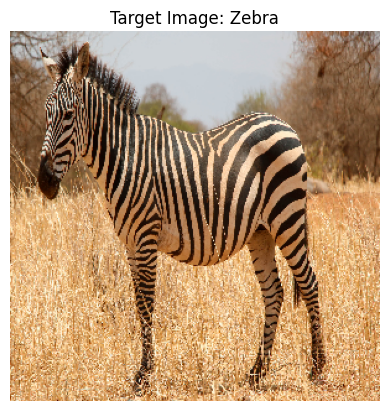

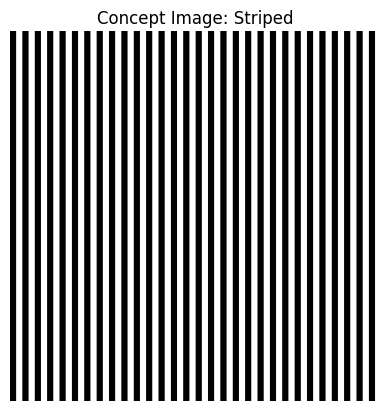

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import os

# Step 1: Load Pretrained Model
model = InceptionV3(weights='imagenet')
layer_name = 'mixed10'  # Layer to get activations from

intermediate_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer(layer_name).output
)

# Step 2: Load a local zebra image
img_path = 'zebra.jpg'  # Ensure this image exists in your working directory
img = load_img(img_path, target_size=(299, 299))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print("Prediction:", decode_predictions(preds, top=3)[0])

# Step 3: Generate synthetic "striped" concept images
def generate_striped_images(num=20):
    images = []
    for _ in range(num):
        img = np.zeros((299, 299, 3), dtype=np.uint8)
        for i in range(0, 299, 10):
            img[:, i:i+5, :] = 255  # white vertical stripes
        images.append(preprocess_input(np.expand_dims(img, axis=0)))
    return np.vstack(images)

striped_images = generate_striped_images(20)

# Step 4: Extract activations
concept_activations = intermediate_model.predict(striped_images)
image_activations = intermediate_model.predict(x)

# Step 5: Train CAV (Concept Activation Vector)
X = np.concatenate([concept_activations, np.random.normal(size=concept_activations.shape)])
y = np.array([1] * len(concept_activations) + [0] * len(concept_activations))

X_flat = X.reshape(X.shape[0], -1)
clf = SGDClassifier().fit(X_flat, y)
cav = clf.coef_.reshape(concept_activations.shape[1:])

# Step 6: Compute directional derivative
image_activ_flat = image_activations.reshape(-1)
cav_flat = cav.reshape(-1)
directional_derivative = np.dot(image_activ_flat, cav_flat)
print(f"Directional derivative: {directional_derivative:.4f}")

# Step 7: TCAV Score: high means concept strongly influences the prediction
tcav_score = np.mean([np.dot(act.reshape(-1), cav_flat) > 0 for act in concept_activations])
print(f"TCAV Score for 'striped' concept influencing 'zebra': {tcav_score:.2f}")

# Step 8: Visualize
plt.imshow(img)
plt.title("Target Image: Zebra")
plt.axis('off')
plt.show()

# Visualize a striped concept
plt.imshow(generate_striped_images(1)[0].astype(np.uint8))
plt.title("Concept Image: Striped")
plt.axis('off')
plt.show()


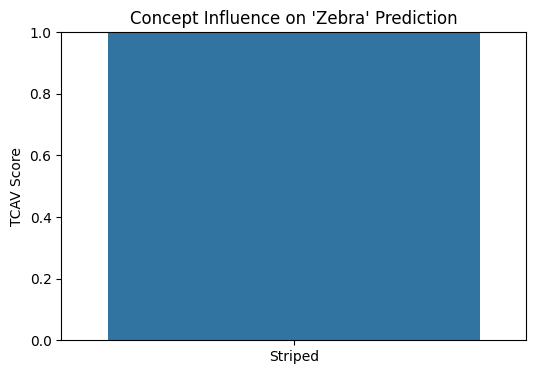

In [ ]:
import seaborn as sns

# Plotting TCAV Score
plt.figure(figsize=(6, 4))
sns.barplot(x=['Striped'], y=[tcav_score])
plt.ylim(0, 1)
plt.ylabel("TCAV Score")
plt.title("Concept Influence on 'Zebra' Prediction")
plt.show()


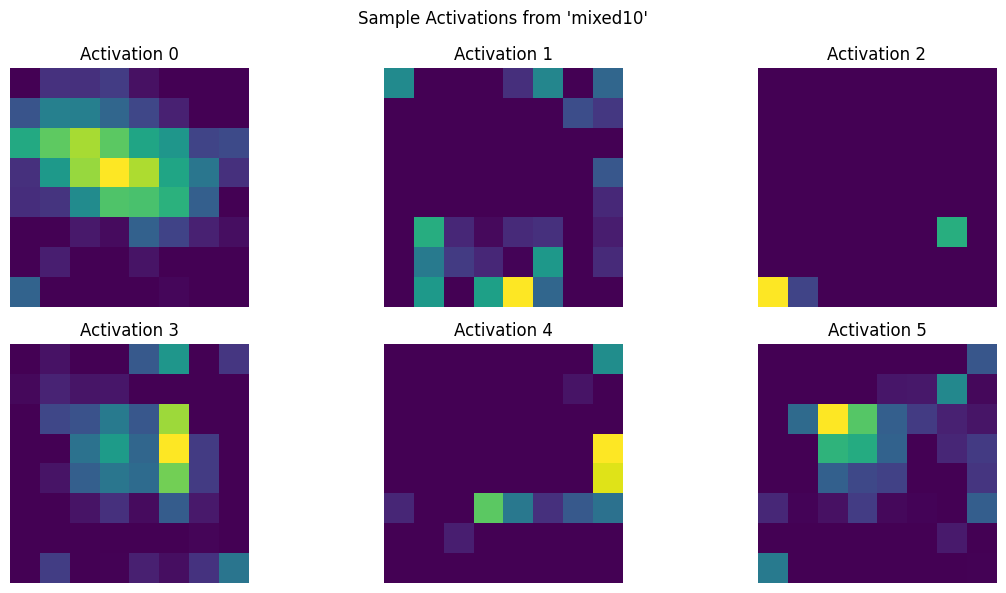

In [ ]:
# Visualizing a few feature maps
activ_map = image_activations[0]  # shape: (H, W, C)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(activ_map[:, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Activation {i}")
plt.suptitle("Sample Activations from 'mixed10'")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: [('n02391049', 'zebra', np.float32(0.93795544)), ('n02422106', 'hartebeest', np.float32(0.0012636642)), ('n01518878', 'ostrich', np.float32(0.0008051923))]


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Directional derivative: 31224.8555
TCAV Score for concept: 1.00


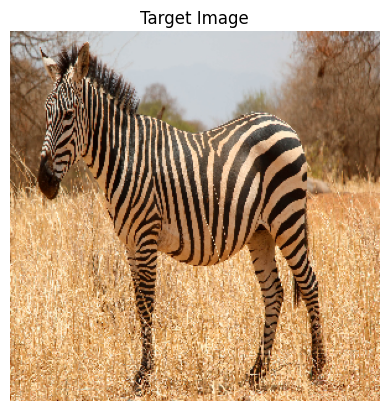

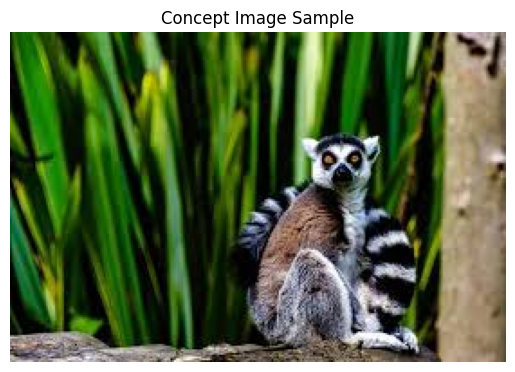

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

# Load pretrained model and intermediate layer
model = InceptionV3(weights='imagenet')
layer_name = 'mixed10'
intermediate_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load and preprocess a target image (e.g., zebra)
img_path = 'zebra.jpg'  # Put your own target image here
img = load_img(img_path, target_size=(299, 299))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print("Prediction:", decode_predictions(preds, top=3)[0])

# Helper function to load images from a folder
def load_images_from_folder(folder, target_size=(299, 299)):
    images = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(folder, filename)
            img = load_img(path, target_size=target_size)
            img_array = preprocess_input(np.expand_dims(img_to_array(img), axis=0))
            images.append(img_array)
    return np.vstack(images)

# Load concept and random images from folders
concept_folder = 'striped'
random_folder = 'sky'

concept_images = load_images_from_folder(concept_folder)
random_images = load_images_from_folder(random_folder)

# Extract activations
concept_activations = intermediate_model.predict(concept_images)
random_activations = intermediate_model.predict(random_images)
image_activations = intermediate_model.predict(x)

# Train CAV
X = np.concatenate([concept_activations, random_activations])
y = np.array([1] * len(concept_activations) + [0] * len(random_activations))

X_flat = X.reshape(X.shape[0], -1)
clf = SGDClassifier().fit(X_flat, y)
cav = clf.coef_.reshape(concept_activations.shape[1:])

# Compute directional derivative
image_activ_flat = image_activations.reshape(-1)
cav_flat = cav.reshape(-1)
directional_derivative = np.dot(image_activ_flat, cav_flat)
print(f"Directional derivative: {directional_derivative:.4f}")

# TCAV Score
tcav_score = np.mean([np.dot(act.reshape(-1), cav_flat) > 0 for act in concept_activations])
print(f"TCAV Score for concept: {tcav_score:.2f}")

# Visualization
plt.imshow(img)
plt.title("Target Image")
plt.axis('off')
plt.show()

plt.imshow(load_img(os.path.join(concept_folder, os.listdir(concept_folder)[0])))
plt.title("Concept Image Sample")
plt.axis('off')
plt.show()
